### Machine Learning Model:
#**Project: Fraud Detection**

**Fraud detection** is a critical application of machine learning and data analytics, particularly in domains where financial transactions or sensitive data are involved.

One of the ***common challenges*** faced by the insurance industry is ***detecting fraudulent claims***, which can lead to significant financial losses. Machine learning algorithms can be used to identify patterns and anomalies in data that may indicate fraudulent behavior.

In this project, we will focus on fraud detection for vehicle insurance claims using a dataset from Kaggle's Vehicle Claim Fraud Detection. Our objective is to build a predictive model that can help distinguish between genuine and fraudulent insurance claims.

###**Objectives**
- **Data Exploration:** <br>
Understand the dataset by performing initial exploration and visualization.
- **Data Preprocessing:** <br>Clean and prepare the dataset for modeling by handling missing values, encoding categorical variables, and normalizing features.
- **Feature Engineering:** <br>Identify and create features that will improve the model's predictive power.
- **Model Training:** <br>Develop a machine learning model using algorithms like Logistic Regression, Decision Trees, or Random Forest.
- **Evaluation:** <br>Evaluate the model's performance using accuracy, precision, recall, and the F1-score to understand its effectiveness in detecting fraud.
- **Deployment:** <br>Prepare the notebook to be a reference for further improvements, such as testing more advanced algorithms or hyperparameter tuning.

### Dataset Description

The Kaggle dataset contains information about <a href='https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection'> vehicle insurance claims </a> , with features such as:

1. **Policy Information:**

- `PolicyType`, `VehicleCategory`, `VehiclePrice`, `BasePolicy`, and `Deductible`: These columns can provide insights into the types of policies and the insured vehicle's value, which may correlate with fraudulent claims.

2. **Demographic Information:**

- `Sex`, `MaritalStatus`, `Age`, `AgeOfPolicyHolder`, and `AddressChange_Claim`: These demographic features might help identify patterns related to fraud.

3. **Claim Information:**

- `Month`, `WeekOfMonth`, `DayOfWeek`, `MonthClaimed`, `WeekOfMonthClaimed`, `DayOfWeekClaimed`: These time-based columns can be useful for detecting suspicious patterns in claim timing.
AccidentArea, Fault, and PoliceReportFiled: Details about the accident can be indicative of legitimate or fraudulent claims.
WitnessPresent, AgentType, NumberOfSuppliments: The presence of witnesses, the type of agent handling the case, and the number of additional documents might provide clues.

4. **Vehicle and Driver Details:**

- `Make`, `AgeOfVehicle`, and `DriverRating`: Information related to the vehicle's make and condition, as well as the driver's record, may influence the likelihood of fraud.
PastNumberOfClaims: A history of multiple claims could be a potential indicator of fraud.

5. **Fraud Label**:

- `FraudFound_P`: The target column indicating whether the claim was fraudulent (1) or not (0).

###Tools & Technologies

We will be using Python in a Jupyter Notebook environment for this project, utilizing libraries such as:

- Pandas for data manipulation.
- Matplotlib and Seaborn for visualization.
- Scikit-learn for machine learning algorithms.
- NumPy for numerical computations.





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
df = pd.read_csv('/content/fraud_oracle.csv')
display(df)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


#Information of the dataset

In [ ]:
print(df.head())

  Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  AgeOfVehicle  \
0          Jan                   1  Female        Single  ...       3 years   
1          Jan                   4    Male        Single  ...       6 years   
2          Nov                   2    Male       Married  ...       7 years   
3          Jul                   1    Male       Married  ...   more than 7   
4          Feb                   2  Female        Single  ...       5 years   

  AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0          26 to 30 

In [ ]:
df.nunique()



,0
Month,12
WeekOfMonth,5
DayOfWeek,7
Make,19
AccidentArea,2
DayOfWeekClaimed,8
MonthClaimed,13
WeekOfMonthClaimed,5
Sex,2
MaritalStatus,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [ ]:
# prompt: display the unique values name in every columns of df

for col in df.columns:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print("-" * 20)

Unique values in column 'Month':
[ 2  4 10  6  3  9  0  7  1  5  8 11]
--------------------
Unique values in column 'WeekOfMonth':
[5 3 2 4 1]
--------------------
Unique values in column 'DayOfWeek':
[6 0 2 1 5 3 4]
--------------------
Unique values in column 'Make':
[ 6 17  5  9  2 13  0  3 11  7 12 18 15 16 14  1 10  4  8]
--------------------
Unique values in column 'AccidentArea':
[1 0]
--------------------
Unique values in column 'DayOfWeekClaimed':
[6 2 5 1 7 3 4 0]
--------------------
Unique values in column 'MonthClaimed':
[ 5 10  6  4  8  3  1  2  9  7 12 11  0]
--------------------
Unique values in column 'WeekOfMonthClaimed':
[1 4 2 3 5]
--------------------
Unique values in column 'Sex':
[0 1]
--------------------
Unique values in column 'MaritalStatus':
[2 1 3 0]
--------------------
Unique values in column 'Age':
[-1.39755351 -0.43401522  0.52952308  1.86365302 -0.95284353 -1.47167184
 -0.28577855 -2.95403844 -0.73048854  0.15893143  2.308363    0.90011473
 -0.8787252 

#Handling Missing Values base on the mean of the dataset

In [ ]:
# Handling missing values (Example: replacing with mode/median)
#df['AgeOfVehicle'].fillna(df['AgeOfVehicle'].mode()[0], inplace=True)
#df['AgeOfPolicyHolder'].fillna(df['AgeOfPolicyHolder'].median(), inplace=True)

# Encode categorical variables using Label Encoding
label_enc = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_enc.fit_transform(df[col])

# Scaling numeric features
scaler = StandardScaler()
num_cols = ['Age', 'Deductible', 'DriverRating', 'RepNumber', 'PastNumberOfClaims']
df[num_cols] = scaler.fit_transform(df[num_cols])


#Feature Correlation


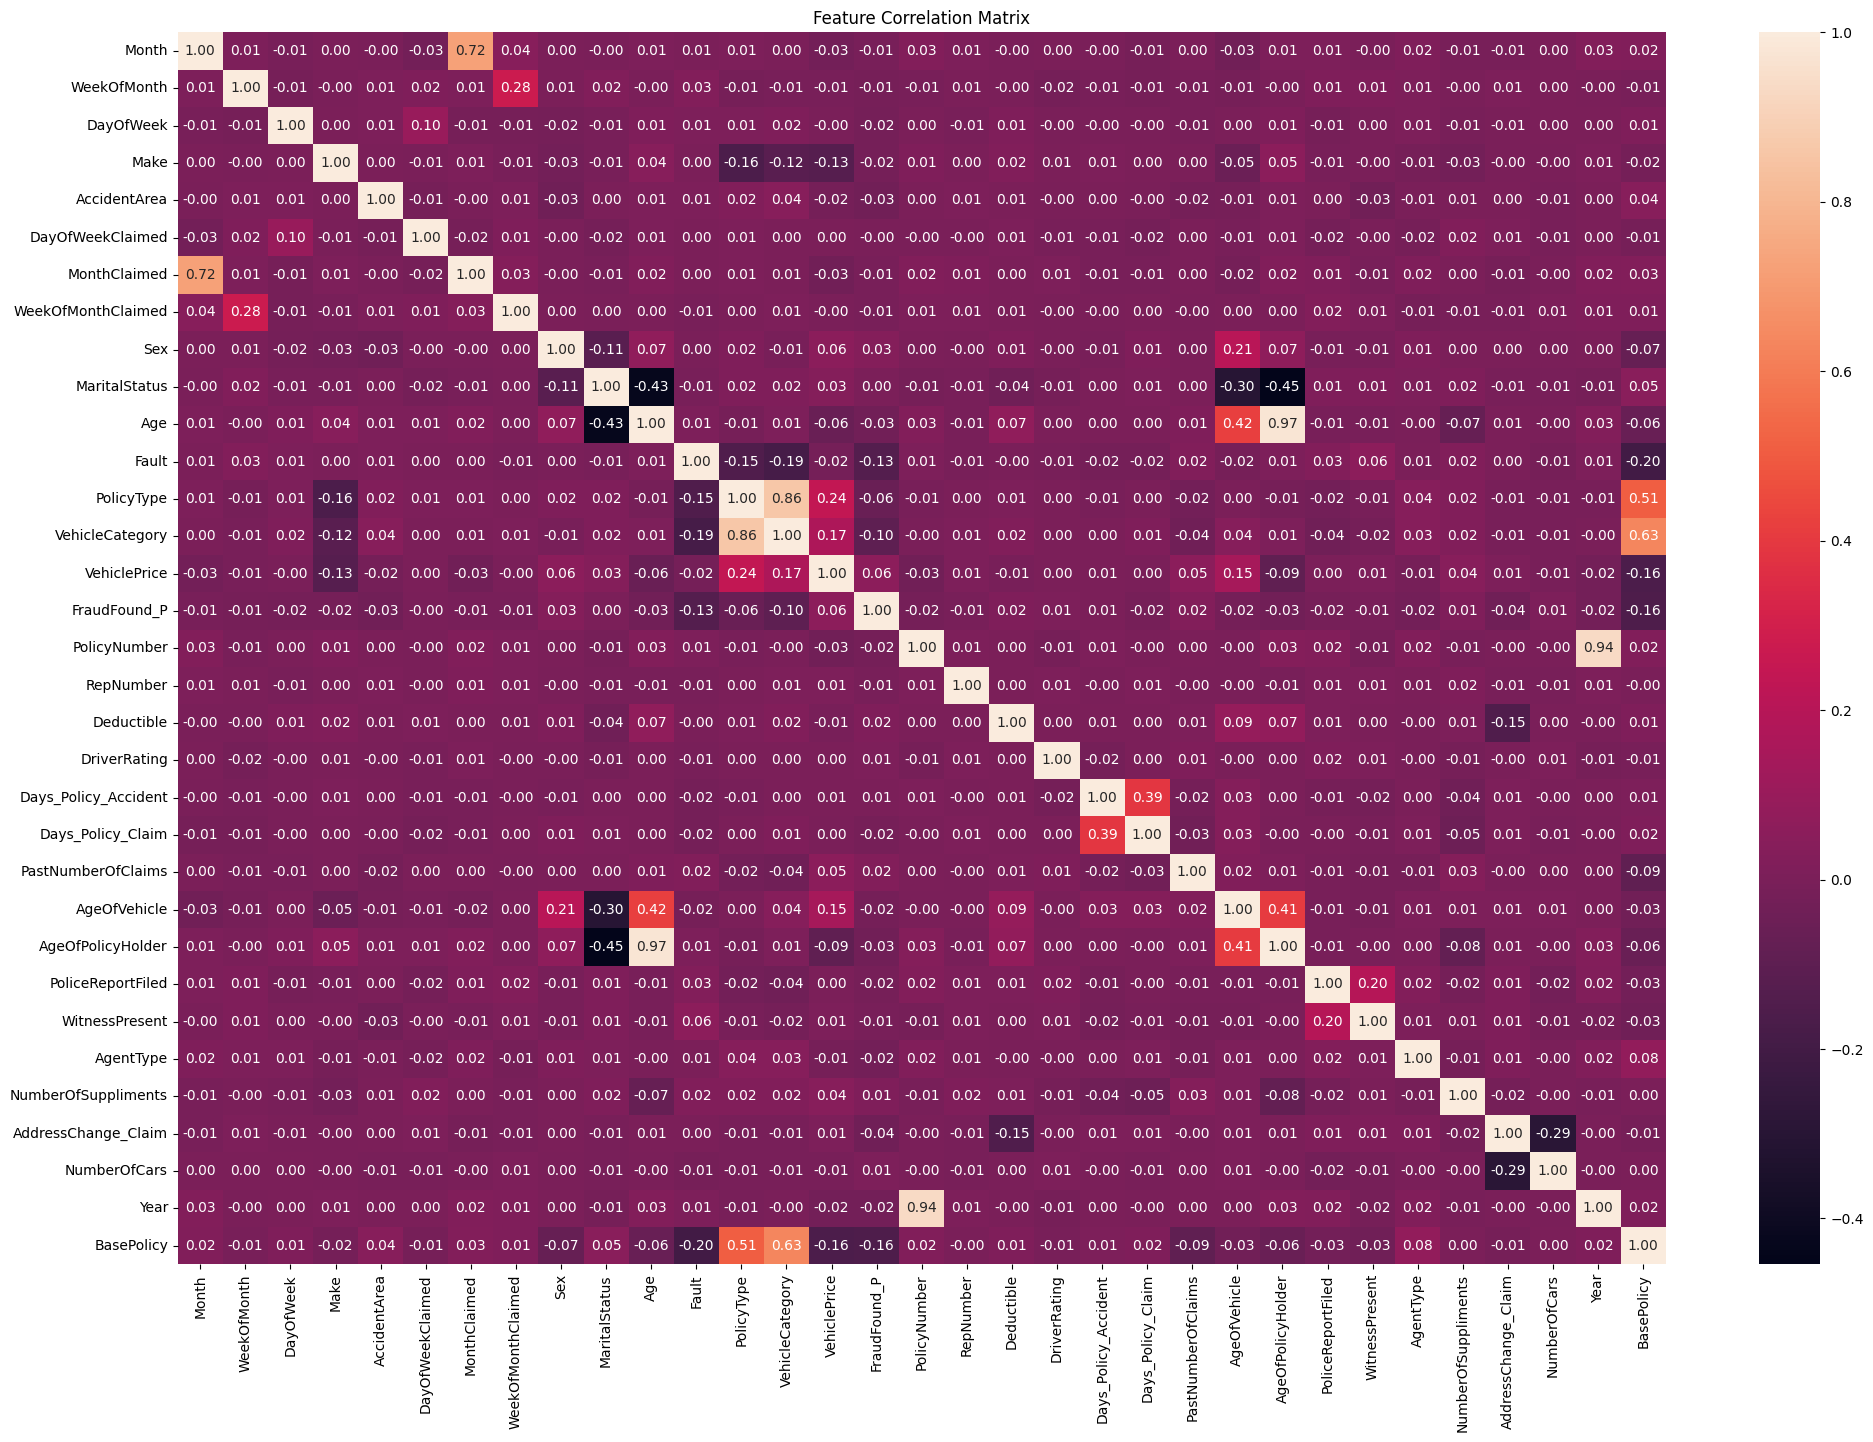

In [ ]:
# Define features (X) and target (y)
X = df.drop(columns=['FraudFound_P', 'PolicyNumber'])
y = df['FraudFound_P']

# Optional: Check feature correlation
plt.figure(figsize=(24, 16))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()


In [ ]:
#Splitting the df into training set and testing sets to evaluates model performance
#(80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#use classification algorithm (random forest) to train the model
#start the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

#train the model
model.fit(X_train, y_train)

#predict on the test set
y_pred = model.predict(X_test)


Accuracy Score: 0.9367704280155642

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2887
           1       1.00      0.01      0.02       197

    accuracy                           0.94      3084
   macro avg       0.97      0.51      0.49      3084
weighted avg       0.94      0.94      0.91      3084



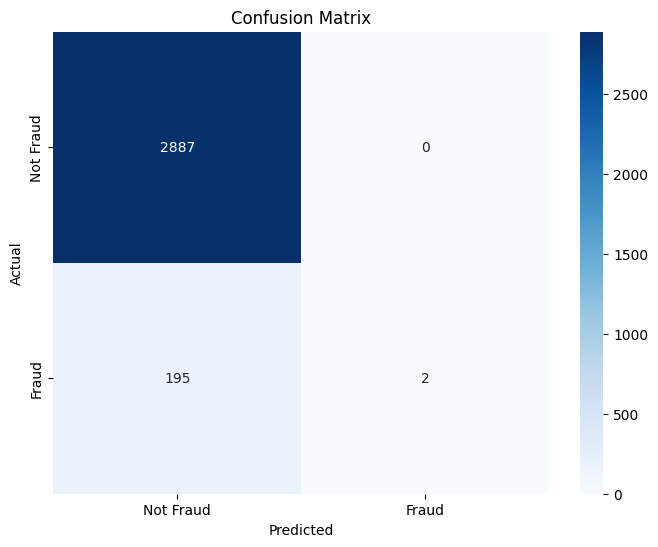

In [ ]:
#we will use metrics like accuracy, precision, recall, and F1-score, focusing on precision and recall
#they provide a wider picture of fraud detection capabilities.

#metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#ploting the confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


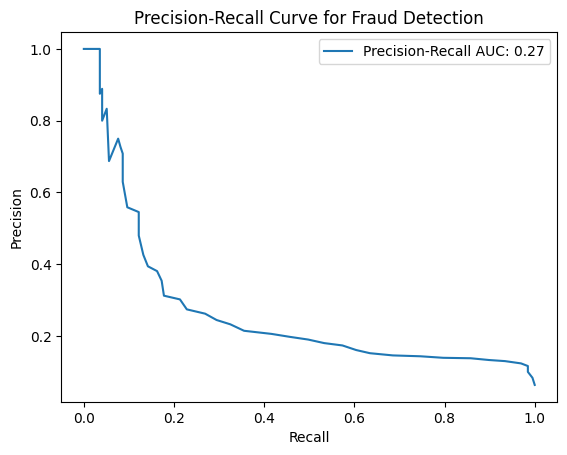

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

# Get predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of fraud class

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
auc_score = auc(recall, precision)

# Plot the Precision-Recall curve
plt.plot(recall, precision, label=f'Precision-Recall AUC: {auc_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision-Recall Curve for Fraud Detection')
plt.show()


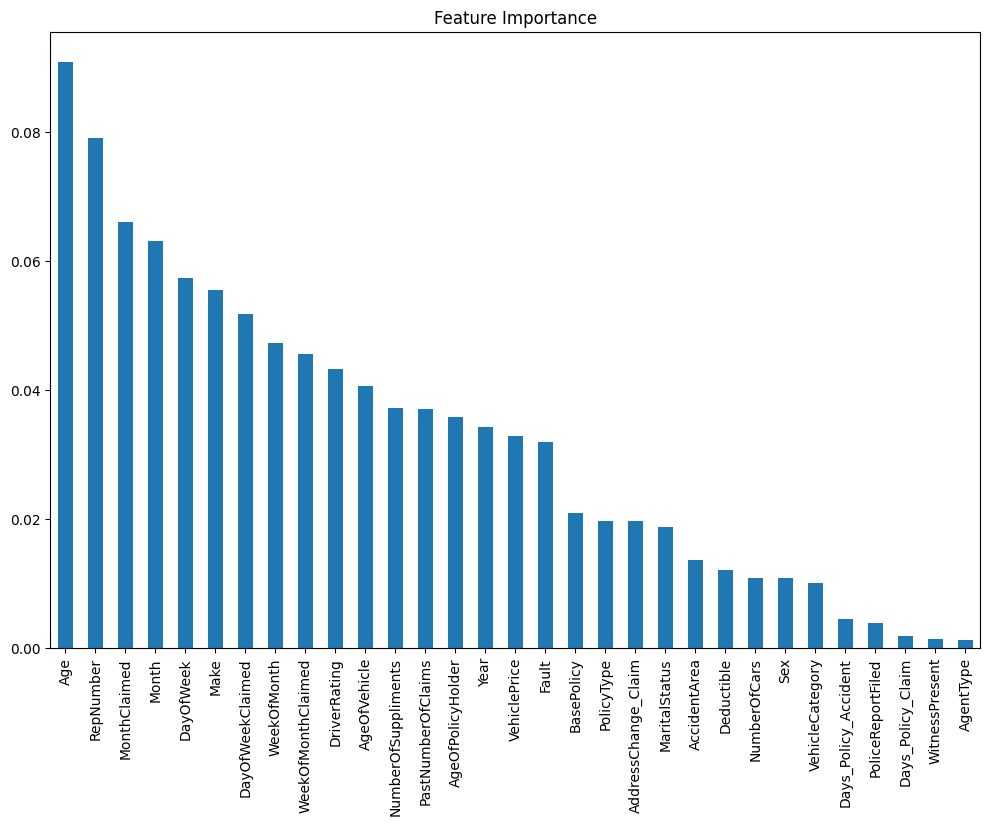

In [ ]:
#shows feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8))
plt.title('Feature Importance')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for RandomForest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


#We will export the model, to make the model accessible outside of Python using Pickle

In [ ]:
import pickle

# Save the trained model
with open('fraud_detection_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [ ]:
#download the file

from google.colab import files

files.download('fraud_detection_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Let's put it in the Gradio

In [ ]:
#we will install gradio
!pip install gradio

In [ ]:
# let's save the trained Random Forest model
#using joblib or pickle. This way, you don't need
#to train the model every time you run the Gradio interface.

import joblib

# Save the trained model
joblib.dump(model, 'fraud_detection_model.pkl')

# Load the saved model (for demonstration)
model = joblib.load('fraud_detection_model.pkl')


In [ ]:
# Function to make predictions
def predict_fraud(
    Month, WeekOfMonth, DayOfWeek, Make, AccidentArea, DayOfWeekClaimed, MonthClaimed,
    WeekOfMonthClaimed, Sex, MaritalStatus, Age, Fault, PolicyType, VehicleCategory,
    VehiclePrice, Deductible, DriverRating, Days_Policy_Accident, Days_Policy_Claim,
    PastNumberOfClaims, AgeOfVehicle, AgeOfPolicyHolder, PoliceReportFiled, WitnessPresent,
    AgentType, NumberOfSuppliments, AddressChange_Claim, NumberOfCars, Year, BasePolicy):

    # Load the pre-trained model
    model = joblib.load('fraud_detection_model.pkl')

    # Create a DataFrame with the input data
    input_data = pd.DataFrame({
        'Month': [Month], 'WeekOfMonth': [WeekOfMonth], 'DayOfWeek': [DayOfWeek],
        'Make': [Make], 'AccidentArea': [AccidentArea], 'DayOfWeekClaimed': [DayOfWeekClaimed],
        'MonthClaimed': [MonthClaimed], 'WeekOfMonthClaimed': [WeekOfMonthClaimed],
        'Sex': [Sex], 'MaritalStatus': [MaritalStatus], 'Age': [Age], 'Fault': [Fault],
        'PolicyType': [PolicyType], 'VehicleCategory': [VehicleCategory], 'VehiclePrice': [VehiclePrice],
        'Deductible': [Deductible], 'DriverRating': [DriverRating], 'Days_Policy_Accident': [Days_Policy_Accident],
        'Days_Policy_Claim': [Days_Policy_Claim], 'PastNumberOfClaims': [PastNumberOfClaims],
        'AgeOfVehicle': [AgeOfVehicle], 'AgeOfPolicyHolder': [AgeOfPolicyHolder],
        'PoliceReportFiled': [PoliceReportFiled], 'WitnessPresent': [WitnessPresent],
        'AgentType': [AgentType], 'NumberOfSuppliments': [NumberOfSuppliments],
        'AddressChange_Claim': [AddressChange_Claim], 'NumberOfCars': [NumberOfCars],
        'Year': [Year], 'BasePolicy': [BasePolicy]
    })

    # Encode and scale input_data as you did during training
    # (Assuming you have LabelEncoder and StandardScaler used during training)

    # Encode categorical columns
    #for col in input_data.select_dtypes(include=['object']).columns:
    #   input_data[col] = label_enc.fit_transform(input_data[col])

    # Scale numerical columns
    #input_data[num_cols] = scaler.transform(input_data[num_cols])

    # Predict using the model
    prediction = model.predict(input_data)

    # Return result
    return "Fraud Detected" if prediction[0] == 1 else "No Fraud Detected"


Gradio Interface:

In [ ]:
import gradio as gr

# Define the Gradio interface
interface = gr.Interface(
    fn=predict_fraud,
    inputs=[
        gr.Dropdown(choices=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], label='Month'),
        gr.Dropdown(choices=[1, 2, 3, 4, 5], label='Week of Month'),
        gr.Dropdown(choices=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], label='Day of Week'),
        gr.Textbox(label='Make'),
        gr.Dropdown(choices=['Urban', 'Rural'], label='Accident Area'),
        gr.Dropdown(choices=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], label='Day of Week Claimed'),
        gr.Dropdown(choices=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], label='Month Claimed'),
        gr.Slider(minimum=1, maximum=5, value=1, label='Week of Month Claimed'),
        gr.Dropdown(choices=['Male', 'Female'], label='Sex'),
        gr.Dropdown(choices=['Single', 'Married', 'Widow', 'Divorced'], label='Marital Status'),
        gr.Slider(minimum=18, maximum=100, value=30, label='Age'),
        gr.Dropdown(choices=['Policy Holder', 'Third Party'], label='Fault'),
        gr.Textbox(label='Policy Type'),
        gr.Textbox(label='Vehicle Category'),
        gr.Dropdown(choices=['<20000', '20000-29000', '30000-39000', '40000-59000', '>60000'], label='Vehicle Price'),
        gr.Slider(minimum=0, maximum=1000, value=200, label='Deductible'),
        gr.Slider(minimum=1, maximum=5, value=3, label='Driver Rating'),
        gr.Textbox(label='Days Policy Accident'),
        gr.Textbox(label='Days Policy Claim'),
        gr.Textbox(label='Past Number of Claims'),
        gr.Textbox(label='Age of Vehicle'),
        gr.Slider(minimum=18, maximum=100, value=40, label='Age of Policy Holder'),
        gr.Dropdown(choices=['Yes', 'No'], label='Police Report Filed'),
        gr.Dropdown(choices=['Yes', 'No'], label='Witness Present'),
        gr.Dropdown(choices=['External', 'Internal'], label='Agent Type'),
        gr.Textbox(label='Number of Supplements'),
        gr.Textbox(label='Address Change Claim'),
        gr.Textbox(label='Number of Cars'),
        gr.Slider(minimum=1990, maximum=2024, value=2020, label='Year'),
        gr.Dropdown(choices=['All Perils', 'Collision', 'Liability'], label='Base Policy')
    ],
    outputs=gr.Textbox(label="Fraud Prediction")
)

# Launch the Gradio interface
interface.launch()


#Exposing the model to Flask API


In [ ]:
!pip install flask joblib pandas scikit-learn
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

#load the model
model = joblib.load('fraud_detection_model.pkl')

#define a route for prediction
@app.route('/predict', methods=['POST'])
def predict():
    try:
        #get data from the request
        data = request.get_json()

        #create a DataFrame from the input data

        input_data = pd.DataFrame([data])

        #make a prediction
        prediction = model.predict(input_data)[0]

        #return the prediction as a JSON response
        return jsonify({'prediction': int(prediction)})  #will rreturn as integer

    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(debug=True, host="0.0.0.0") #allow external

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
